In [75]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
tf.random.set_seed(89)

In [ ]:
# #Dividing data into train, valid and test dirs

# os.chdir('data')
# if os.path.isdir('train/mo') is False:
#     os.makedirs('train/mo')
#     os.makedirs('train/nomo')
#     os.makedirs('test/mo')
#     os.makedirs('test/nomo')
#     os.makedirs('valid/mo')
#     os.makedirs('valid/nomo')
    
#     for i in random.sample(glob.glob('mo*'), 750):
#         shutil.move(i, 'train/mo')
#     for i in random.sample(glob.glob('nomo*'), 750):
#         shutil.move(i, 'train/nomo')
#     for i in random.sample(glob.glob('mo*'), 200):
#         shutil.move(i, 'valid/mo')
#     for i in random.sample(glob.glob('nomo*'), 200):
#         shutil.move(i, 'valid/nomo')
#     for i in random.sample(glob.glob('mo*'), 75):
#         shutil.move(i, 'test/mo')
#     for i in random.sample(glob.glob('nomo*'), 75):
#         shutil.move(i, 'test/nomo')

In [ ]:
# os.chdir('../../../')

In [53]:
# Setting the data paths as variables

train_path = '/Users/sagunmalwatkar/mo_vs_nomo/data/train'
test_path = '/Users/sagunmalwatkar/mo_vs_nomo/data/test'
valid_path = '/Users/sagunmalwatkar/mo_vs_nomo/data/valid'

In [54]:
# Creating batches for each category that the model can process

datagen = ImageDataGenerator(rescale=1./255)

train_batches = datagen.flow_from_directory(directory=train_path, target_size=(224,224), classes=['mo', 'nomo'], batch_size=20)
test_batches = datagen.flow_from_directory(directory=test_path, target_size=(224,224), classes=['mo', 'nomo'], batch_size=20, shuffle=False)
valid_batches = datagen.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['mo', 'nomo'], batch_size=20)

Found 1500 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [55]:
# Creating a training a batch

imgs, labels = next(train_batches)

In [56]:
#function from the Tensorflow documentation that plots the processed images

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

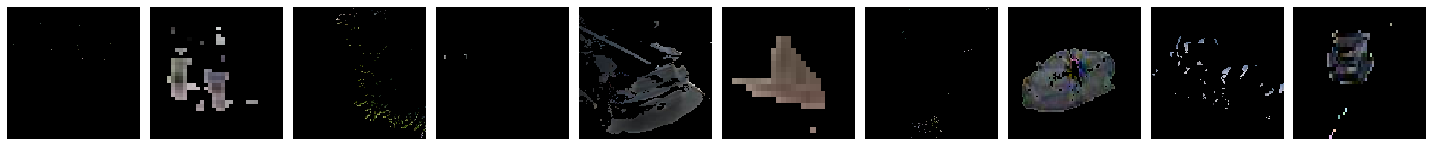

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [57]:
# Plotting the training batch created and printing their labels

plotImages(imgs)
print(labels)

In [58]:
#Creating the CNN model

model = Sequential([Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
                   MaxPool2D(pool_size=(2, 2), strides=2),
                   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
                   MaxPool2D(pool_size=(2, 2), strides=2),
                   Flatten(),
                   Dense(units=2, activation=tf.keras.activations.softmax)])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [60]:
# Compiling the model

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
# Training the model 

model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=len(valid_batches), 
          validation_steps=len(valid_batches), epochs=5, verbose=2)

Train for 75 steps, validate for 20 steps
Epoch 1/5
75/75 - 82s - loss: 0.4396 - accuracy: 0.8227 - val_loss: 0.3240 - val_accuracy: 0.8950
Epoch 2/5
75/75 - 87s - loss: 0.3363 - accuracy: 0.8847 - val_loss: 0.3081 - val_accuracy: 0.8925
Epoch 3/5
75/75 - 82s - loss: 0.2955 - accuracy: 0.9007 - val_loss: 0.3123 - val_accuracy: 0.9050
Epoch 4/5
75/75 - 84s - loss: 0.2642 - accuracy: 0.9140 - val_loss: 0.3128 - val_accuracy: 0.8825
Epoch 5/5
75/75 - 82s - loss: 0.2298 - accuracy: 0.9167 - val_loss: 0.3049 - val_accuracy: 0.8900


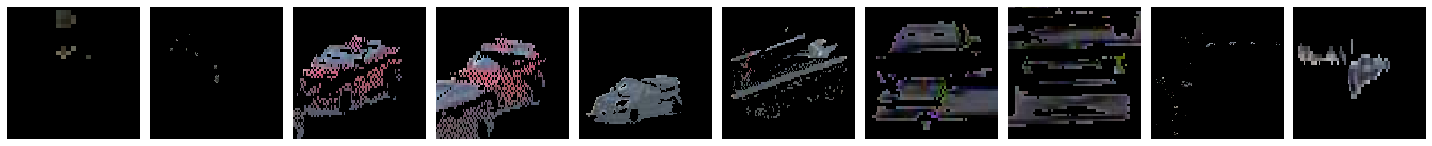

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [62]:
# Creating and plotting the test batch created

test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [63]:
# Using the model to test the batch

predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [64]:
#np.round(predictions)

In [65]:
# Creating a confusion matrix to for visualization of results
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [66]:
#test_batches.classes

In [67]:
# function from scikit-learn documentation that plots the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [68]:
test_batches.class_indices

{'mo': 0, 'nomo': 1}

Confusion matrix, without normalization
[[59 16]
 [ 2 73]]


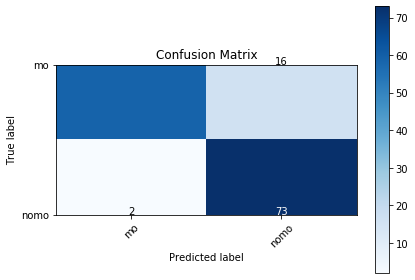

In [69]:
# Plotting the matrix

cm_plot_labels = ['mo', 'nomo']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [70]:
#model.save('/Users/sagunmalwatkar/mo_vs_nomo/cnn-practice-1.h5')

In [72]:
# Testing using specific images

img1 = keras.preprocessing.image.load_img(
    "/Users/sagunmalwatkar/mo_vs_nomo/data/mo-0-00d9d3c6-4cda-4e8c-ab9f-1273afff67fe_10_frame.jpg.bmp", target_size=(224,224)
)
img_array1 = keras.preprocessing.image.img_to_array(img1)
img_array1 = tf.expand_dims(img_array1, 0)  # Create batch axis

predictions1 = model.predict(img_array1)
print(predictions1)
score1 = predictions1[0]
print(score1)
print(
    "This image is %.2f percent mo and %.2f percent nomo."
    % (100 * (1 - score1[1]), 100 * score1[1])
)


[[1. 0.]]
[1. 0.]
This image is 100.00 percent mo and 0.00 percent nomo.


In [73]:
img2 = keras.preprocessing.image.load_img(
    "/Users/sagunmalwatkar/mo_vs_nomo/data/train/nomo/nomo-427-02846713-9a09-4fbb-8b2b-171bd7a5c035_6_frame.jpg.bmp", target_size=(224,224)
)
img_array2 = keras.preprocessing.image.img_to_array(img2)
img_array2 = tf.expand_dims(img_array2, 0)  # Create batch axis

predictions2 = model.predict(img_array2)
print(predictions2)
score2 = predictions2[0]
print(score2)
print(
    "This image is %.2f percent mo and %.2f percent nomo."
    % (100 * (1 - score2[1]), 100 * score2[1])
)

[[0. 1.]]
[0. 1.]
This image is 0.00 percent mo and 100.00 percent nomo.


In [74]:

img3 = keras.preprocessing.image.load_img(
    "/Users/sagunmalwatkar/mo_vs_nomo/data/valid/nomo/nomo-1397-0686d610-9529-4d31-8583-37b61443e827_13_frame.jpg.bmp", target_size=(224,224)
)
img_array3 = keras.preprocessing.image.img_to_array(img3)
img_array3 = tf.expand_dims(img_array3, 0)  # Create batch axis

predictions3 = model.predict(img_array3)
print(predictions3)
score3 = predictions3[0]
print(score3)
print(
    "This image is %.2f percent mo and %.2f percent nomo."
    % (100 * (1 - score3[1]), 100 * score3[1])
)

[[2.6766963e-33 1.0000000e+00]]
[0. 1.]
This image is 0.00 percent mo and 100.00 percent nomo.


In [84]:
img = keras.preprocessing.image.load_img(
    "/Users/sagunmalwatkar/Desktop/Test_images/0-0105150d-7828-464a-b0a0-b99d1018531a_17_frame.jpg.bmp", target_size=(224,224)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
score = predictions[0]
print(score)
print(
    "This image is %.2f percent mo and %.2f percent nomo."
    % (100 * (1 - score[1]), 100 * score[1])
)

[[1. 0.]]
[1. 0.]
This image is 100.00 percent mo and 0.00 percent nomo.
